In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Pre Processing

In [2]:
from cleanProcess.DataCleaning import GetData
pathcsv = "waitlist_kidney_brazil.csv"
Data = GetData(path=pathcsv)

In [3]:
Data.raw_data.head(5)

,Id,date,age_at_list_registration,age_cat,time_on_Dialysis,race,sex,underline_disease,diabetes,Blood_type,...,Time_death,Transplant,Transplant_Y_N,X36MthsTx,Time_Tx,priorization,removed_list,razon_removed,time,event
0,4,6/29/2017,67,Maior.60,1.0,Branca,M,Outras,1,A,...,13,Não,Não,0,13.07,Não,Não,NaN,392,0
1,5,11/3/2008,58,18.a.60,4.0,Branca,M,Diabetes,0,A,...,69,Óbito Lista,Não,0,68.87,Não,Não,NaN,2066,2
2,6,7/13/2010,51,18.a.60,2.0,Branca,M,HAS,1,O,...,98,Não,Não,0,12.17,Não,Sim,Removido (suspenso > 365 dias),365,3
3,7,10/3/2011,52,18.a.60,17.0,Branca,M,Diabetes,0,O,...,83,Não,Não,0,12.17,Não,Sim,Removido (suspenso > 365 dias),365,3
4,8,7/5/2006,67,Maior.60,68.0,Parda,M,HAS,1,A,...,6,Óbito Lista,Não,0,6.47,Não,Não,NaN,194,2


In [4]:
Data.cleaned_data.head(5)

,age_at_list_registration,time_on_Dialysis,race,sex,underline_disease,diabetes,Blood_type,number_transfusion,gestation,number_gestation,...,HLA_DR2,DR_00,B_00,A_00,chagas,anti.HBc,anti.HCV,agHBs,time,event
0,67,1.0,White,M,Others,1,A,0,False,0.0,...,7,heterozygous,heterozygous,heterozygous,False,False,False,False,392,0
6,61,29.0,Black,M,HAS,1,A,1,False,0.0,...,12,heterozygous,heterozygous,heterozygous,False,False,False,False,1114,0
8,55,17.0,White,M,Diabetes,0,B,0,False,0.0,...,12,heterozygous,heterozygous,heterozygous,False,False,False,False,379,0
9,57,10.0,White,M,HAS,1,B,0,False,0.0,...,9,heterozygous,heterozygous,heterozygous,False,False,False,False,1291,0
11,39,12.0,White,M,GNC,1,A,0,False,0.0,...,14,heterozygous,heterozygous,heterozygous,False,False,False,False,4069,0


In [5]:
from sklearn.preprocessing import MinMaxScaler
from cleanProcess.DataCleaning import encode_binary_columns
from cleanProcess.DataCleaning import one_hot_encode

df_clean = Data.cleaned_data
outcome = "time"

# Drop variables with high multicollinearity
df_clean = df_clean.drop(["gestation", "prior_transplant"], axis=1)

#Encode binary
tempdf = encode_binary_columns(df_clean)

#one_hot_encode for categorical values
tempdf = one_hot_encode(tempdf)

#Get rid of redundant diabetes
tempdf = tempdf.drop("underline_disease_Diabetes", axis=1)
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23147 entries, 0 to 48151
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age_at_list_registration        23147 non-null  int64  
 1   time_on_Dialysis                23147 non-null  float64
 2   sex                             23147 non-null  int32  
 3   diabetes                        23147 non-null  int64  
 4   number_transfusion              23147 non-null  int64  
 5   number_gestation                23147 non-null  float64
 6   number_prior_transplant         23147 non-null  int64  
 7   cPRA                            23147 non-null  int64  
 8   HLA_A1                          23147 non-null  int64  
 9   HLA_A2                          23147 non-null  int64  
 10  HLA_B1                          23147 non-null  int64  
 11  HLA_B2                          23147 non-null  int64  
 12  HLA_DR1                         

In [6]:
# drop redundant dummy variable columns
tempdf = tempdf.drop(['race_Yellow','Blood_type_AB','subregion_UNICAMP'], axis=1)
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23147 entries, 0 to 48151
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age_at_list_registration        23147 non-null  int64  
 1   time_on_Dialysis                23147 non-null  float64
 2   sex                             23147 non-null  int32  
 3   diabetes                        23147 non-null  int64  
 4   number_transfusion              23147 non-null  int64  
 5   number_gestation                23147 non-null  float64
 6   number_prior_transplant         23147 non-null  int64  
 7   cPRA                            23147 non-null  int64  
 8   HLA_A1                          23147 non-null  int64  
 9   HLA_A2                          23147 non-null  int64  
 10  HLA_B1                          23147 non-null  int64  
 11  HLA_B2                          23147 non-null  int64  
 12  HLA_DR1                         

In [7]:
#Splitting test and train
traindata = tempdf[tempdf['event'] == 1]
testdata = tempdf[tempdf['event'] == 0]

#Getting Y_train,XTrain, ...
Y_train = traindata[outcome]
X_train = traindata.drop([outcome,"event"],axis=1) 

Y_test = testdata[outcome]
X_test = testdata.drop([outcome,"event"],axis=1) 

#Scaling values
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression

# initialize linear regression model
model_linear = LinearRegression()

# train linear regression model
model_linear.fit(X_train_scaled, Y_train)

LinearRegression()

In [9]:
# view coefficients
pd.Series(model_linear.coef_, index=X_train.columns)

age_at_list_registration           95.037820
time_on_Dialysis                 -477.844626
sex                               -30.254307
diabetes                          265.935584
number_transfusion               -346.963584
number_gestation                   -4.560383
number_prior_transplant           150.591033
cPRA                              369.780047
HLA_A1                             -4.628127
HLA_A2                            163.586543
HLA_B1                              4.129499
HLA_B2                            175.353198
HLA_DR1                            12.727780
HLA_DR2                            34.141215
DR_00                             376.012927
B_00                              314.043870
A_00                              169.384681
chagas                           -270.403700
anti.HBc                         -201.483013
anti.HCV                          176.398994
agHBs                            -107.686596
race_Black                        -95.654338
race_Brown

In [10]:
# get model predications
linear_pred = model_linear.predict(X_test_scaled)
linear_pred

array([ 834.36999376, 1167.67810641,  719.41057281, ...,  733.72468352,
        831.21183023,  755.2459932 ])

<Axes: ylabel='time'>

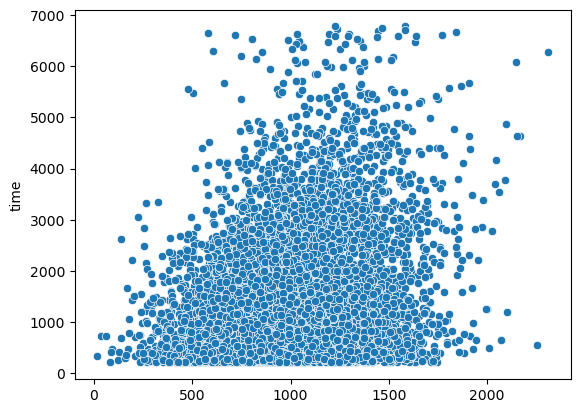

In [11]:
sns.scatterplot(x=linear_pred, y=Y_test)

In [12]:
# model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
MAE = mean_absolute_error(Y_test, linear_pred)

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(Y_test, linear_pred)

# Calculate Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)

print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 723.8537416970669
MSE: 1129373.5222392904
RMSE: 1062.7198700689144


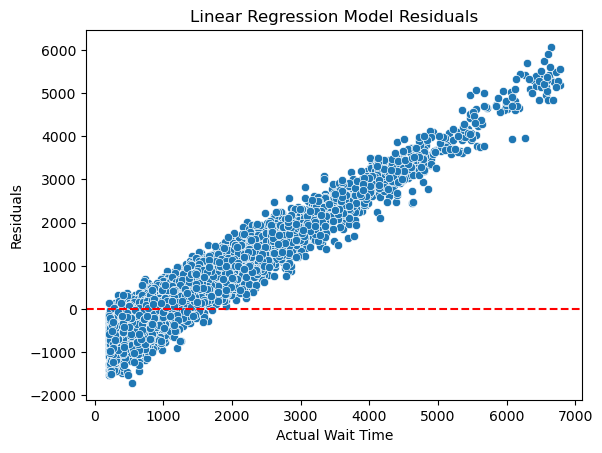

In [13]:
# calculate residuals
linear_res = Y_test - linear_pred
linear_res

# create residuals plot
sns.scatterplot(x=Y_test,y=linear_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Linear Regression Model Residuals")
plt.xlabel("Actual Wait Time")
plt.ylabel("Residuals")
plt.show()

### Splitting Transplanted Patients Only

In [51]:
#Splitting test and train
traindata2 = tempdf[tempdf['event'] == 1]

X = traindata2.drop([outcome,"event"],axis=1)
Y = traindata2[outcome]

#Getting Y_train,X_train, ...
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.3, random_state=101)

#Scaling values
X_train_scaled2 = sc.fit_transform(X_train2)
X_test_scaled2 = sc.transform(X_test2)

In [52]:
# initialize linear regression model
model_linear2 = LinearRegression()

# train linear regression model
model_linear2.fit(X_train_scaled2, Y_train2)

LinearRegression()

In [16]:
# view coefficients
pd.Series(model_linear2.coef_, index=X_train2.columns)

age_at_list_registration          138.430230
time_on_Dialysis                 -389.187635
sex                               -28.351311
diabetes                          277.186115
number_transfusion               -405.632018
number_gestation                  -14.862538
number_prior_transplant            50.364166
cPRA                              356.438644
HLA_A1                             -4.158747
HLA_A2                            207.247089
HLA_B1                            -14.202498
HLA_B2                            232.956556
HLA_DR1                            33.279441
HLA_DR2                            46.198306
DR_00                             398.653016
B_00                              375.343485
A_00                              175.356894
chagas                           -186.587909
anti.HBc                         -230.649531
anti.HCV                          115.727376
agHBs                             -51.528249
race_Black                       -120.143194
race_Brown

In [17]:
# get model predications
linear_pred2 = model_linear2.predict(X_test_scaled2)
linear_pred2

array([ 785.29676747, 1313.61475372,  911.57111401, ..., 1137.88923905,
       1129.88835972, 1005.50613257])

<Axes: ylabel='time'>

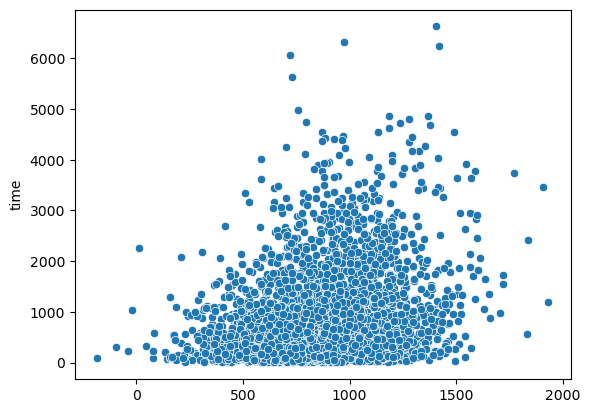

In [18]:
sns.scatterplot(x=linear_pred2, y=Y_test2)

In [19]:
# Calculate Mean Absolute Error (MAE)
MAE_lm2 = mean_absolute_error(Y_test2, linear_pred2)

# Calculate Mean Squared Error (MSE)
MSE_lm2 = mean_squared_error(Y_test2, linear_pred2)

# Calculate Root Mean Squared Error (RMSE)
RMSE_lm2 = np.sqrt(MSE_lm2)

print(f"MAE: {MAE_lm2}\nMSE: {MSE_lm2}\nRMSE: {RMSE_lm2}")

MAE: 593.9887673308505
MSE: 655956.8903806228
RMSE: 809.911655911077


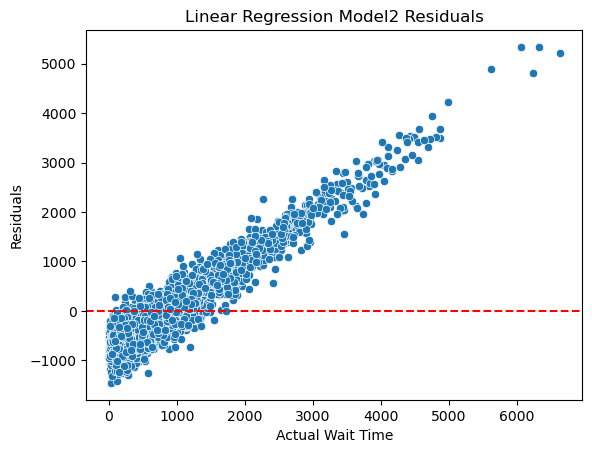

In [20]:
# calculate residuals
linear_res2 = Y_test2 - linear_pred2
linear_res2

# create residuals plot
sns.scatterplot(x=Y_test2,y=linear_res2)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Linear Regression Model2 Residuals")
plt.xlabel("Actual Wait Time")
plt.ylabel("Residuals")
plt.show()

### Non-scaled data

In [21]:
# initialize linear regression model
model_linear_nonsc = LinearRegression()

# train linear regression model
model_linear_nonsc.fit(X_train2, Y_train2)

LinearRegression()

In [22]:
# get model predications
linear_pred_nonsc = model_linear_nonsc.predict(X_test2)
linear_pred_nonsc

array([ 785.29676747, 1313.61475372,  911.57111401, ..., 1137.88923905,
       1129.88835972, 1005.50613257])

In [23]:
# view coefficients
pd.Series(model_linear_nonsc.coef_, index=X_train2.columns)

age_at_list_registration            1.752281
time_on_Dialysis                   -2.162154
sex                               -28.351311
diabetes                          277.186115
number_transfusion               -135.210673
number_gestation                   -1.061610
number_prior_transplant            10.072833
cPRA                                3.564386
HLA_A1                             -0.051984
HLA_A2                              2.590589
HLA_B1                             -0.175339
HLA_B2                              2.840934
HLA_DR1                             2.079965
HLA_DR2                             2.887394
DR_00                             398.653016
B_00                              375.343485
A_00                              175.356894
chagas                           -186.587909
anti.HBc                         -230.649531
anti.HCV                          115.727376
agHBs                             -51.528249
race_Black                       -120.143194
race_Brown

In [24]:
# Calculate Mean Absolute Error (MAE)
MAE_nonsc = mean_absolute_error(Y_test2, linear_pred_nonsc)

# Calculate Mean Squared Error (MSE)
MSE_nonsc = mean_squared_error(Y_test2, linear_pred_nonsc)

# Calculate Root Mean Squared Error (RMSE)
RMSE_nonsc = np.sqrt(MSE_nonsc)

print(f"MAE: {MAE_nonsc}\nMSE: {MSE_nonsc}\nRMSE: {RMSE_nonsc}")

MAE: 593.9887673308505
MSE: 655956.8903806229
RMSE: 809.9116559110771


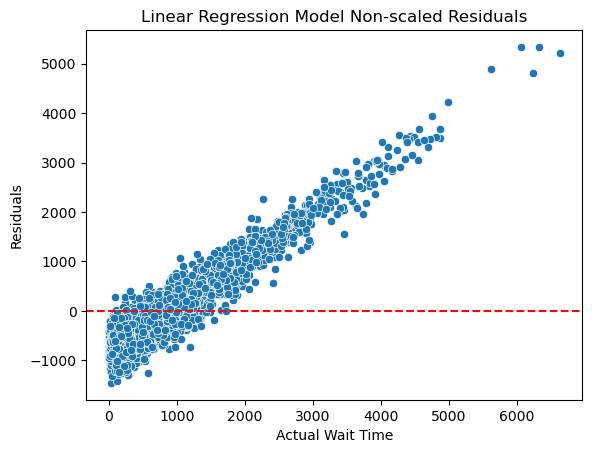

In [25]:
# calculate residuals
linear_res_nonsc = Y_test2 - linear_pred_nonsc
linear_res_nonsc

# create residuals plot
sns.scatterplot(x=Y_test2,y=linear_res_nonsc)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Linear Regression Model Non-scaled Residuals")
plt.xlabel("Actual Wait Time")
plt.ylabel("Residuals")
plt.show()

In [26]:
# compare model performance
lm_performance = {'MAE': [MAE, MAE_lm2, MAE_nonsc], 
                  'MSE': [MSE, MSE_lm2, MSE_nonsc],
                  'RMSE': [RMSE, RMSE_lm2, RMSE_nonsc]}

pd.DataFrame.from_dict(lm_performance)

,MAE,MSE,RMSE
0,723.853742,1.129374e+06,1062.719870
1,593.988767,6.559569e+05,809.911656
2,593.988767,6.559569e+05,809.911656


# Survival Analysis

In [27]:
# install scikit survival package
# conda install -c sebp scikit-survival

In [28]:
from cleanProcess.DataCleaning_survival import GetDataSurvival
pathcsv = "waitlist_kidney_brazil.csv"
Data_cox = GetDataSurvival(path=pathcsv)

In [29]:
Data_cox.cleaned_data.head(5)

,age_cat,time_on_Dialysis,race,sex,underline_disease,diabetes,Blood_type,number_transfusion,number_gestation,number_prior_transplant,...,HLA_DR2,DR_00,B_00,A_00,chagas,anti.HBc,anti.HCV,agHBs,Transplant_Y_N,time
0,>60,1.0,White,M,Others,1,A,0,0.0,0,...,7,heterozygous,heterozygous,heterozygous,False,False,False,False,False,392
1,Between_18_60,4.0,White,M,Diabetes,0,A,0,0.0,0,...,0,homozygous,heterozygous,heterozygous,False,False,False,False,False,2066
2,Between_18_60,2.0,White,M,HAS,1,O,0,0.0,0,...,15,heterozygous,heterozygous,heterozygous,False,False,False,False,False,365
3,Between_18_60,17.0,White,M,Diabetes,0,O,0,0.0,1,...,15,heterozygous,heterozygous,heterozygous,False,False,False,False,False,365
4,>60,68.0,Brown,M,HAS,1,A,0,0.0,0,...,15,heterozygous,heterozygous,heterozygous,False,False,False,False,False,194


In [40]:
# get cleaned data with original categories
df_surv = Data_cox.cleaned_data
df_surv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42882 entries, 0 to 48152
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_cat                  42882 non-null  object 
 1   time_on_Dialysis         42882 non-null  float64
 2   race                     42882 non-null  object 
 3   sex                      42882 non-null  int32  
 4   underline_disease        42882 non-null  object 
 5   diabetes                 42882 non-null  int64  
 6   Blood_type               42882 non-null  object 
 7   number_transfusion       42882 non-null  int64  
 8   number_gestation         42882 non-null  float64
 9   number_prior_transplant  42882 non-null  int64  
 10  subregion                42882 non-null  object 
 11  cPRA_cat                 42882 non-null  object 
 12  HLA_A1                   42882 non-null  int64  
 13  HLA_A2                   42882 non-null  int64  
 14  HLA_B1                

In [30]:
# get cleaned and encoded data
df_cox = Data_cox.get_encoded_data()
df_cox.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42882 entries, 0 to 48152
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   time_on_Dialysis                42882 non-null  float64
 1   sex                             42882 non-null  int32  
 2   diabetes                        42882 non-null  int64  
 3   number_transfusion              42882 non-null  int64  
 4   number_gestation                42882 non-null  float64
 5   number_prior_transplant         42882 non-null  int64  
 6   HLA_A1                          42882 non-null  int64  
 7   HLA_A2                          42882 non-null  int64  
 8   HLA_B1                          42882 non-null  int64  
 9   HLA_B2                          42882 non-null  int64  
 10  HLA_DR1                         42882 non-null  int64  
 11  HLA_DR2                         42882 non-null  int64  
 12  DR_00                           

In [31]:
# prepare outcome array for survival analysis
# df_cox = df_cox.replace({'Transplant_Y_N': {'Sim': True,'Não': False}})

# create empty structured array for survival outcomes
# -  survival status outcome (boolean): 'Transplant_Y_N'
# -  survival time outcome (numeric): 'time'

array_size = df_cox.shape[0]
Y_data = np.zeros(array_size, dtype={'names':('Transplant_Y_N', 'time'),
                          'formats':('?', 'f8')})
# print(Y_data.dtype)

# fill structured array with survival outcomes
Y_data['Transplant_Y_N'] = df_cox['Transplant_Y_N']
Y_data['time'] = df_cox['time']
Y_data

array([(False,  392.), (False, 2066.), (False,  365.), ...,
       (False, 1237.), (False,  252.), (False,  605.)],
      dtype=[('Transplant_Y_N', '?'), ('time', '<f8')])

In [32]:
# prepare predictors 
X_data = df_cox.drop(['Transplant_Y_N', 'time'],axis=1)
X_data

,time_on_Dialysis,sex,diabetes,number_transfusion,number_gestation,number_prior_transplant,HLA_A1,HLA_A2,HLA_B1,HLA_B2,...,underline_disease_Pielonefrite,Blood_type_AB,Blood_type_B,Blood_type_O,subregion_HCFMUSP,subregion_UNICAMP,subregion_UNIFESP,cPRA_cat_Between_0_50,cPRA_cat_Between_50_80,cPRA_cat_More_80
0,1.0,1,1,0,0.0,0,1,26,44,51,...,0,0,0,0,0,0,1,0,0,0
1,4.0,1,0,0,0.0,0,1,24,18,35,...,0,0,0,0,0,1,0,0,0,0
2,2.0,1,1,0,0.0,0,24,25,14,18,...,0,0,0,1,0,0,1,0,1,0
3,17.0,1,0,0,0.0,1,24,25,14,18,...,0,0,0,1,0,0,1,1,0,0
4,68.0,1,1,0,0.0,0,24,68,14,27,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48146,6.0,0,1,0,2.0,0,0,24,13,40,...,0,0,1,0,0,0,1,0,0,0
48149,121.0,0,1,0,2.0,1,1,36,35,58,...,0,0,1,0,1,0,0,0,0,1
48150,15.0,0,1,1,1.0,0,3,74,7,35,...,0,0,0,0,1,0,0,0,0,0
48151,26.0,0,1,0,11.0,0,1,3,35,42,...,0,0,0,0,0,0,1,0,0,0


### Kaplan-Meier Univariate Models    
Simple step function visualization of patient probability of receiving a transplant. In our project, survival_prob is the probability that patient receives a transplant during observation period.

Text(0.5, 0, 'time $t$')

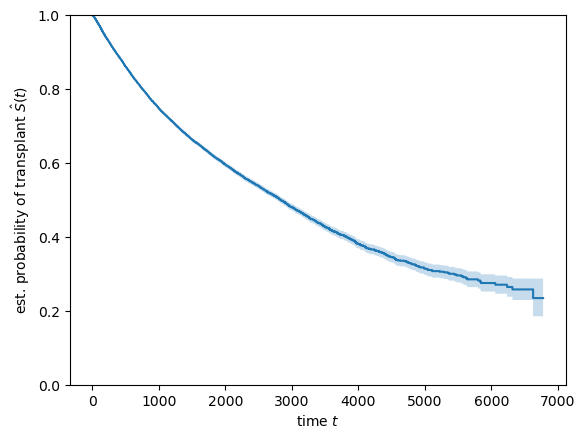

In [33]:
# import kaplan-meier estimator from skikit non-parametric library
from sksurv.nonparametric import kaplan_meier_estimator

# get estimates of survival probability
time, survival_prob, conf_int = kaplan_meier_estimator(Y_data["Transplant_Y_N"], Y_data["time"], conf_type="log-log")

plt.step(time, survival_prob, where="post")
plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
plt.ylim(0, 1)
plt.ylabel("est. probability of transplant $\hat{S}(t)$")
plt.xlabel("time $t$")

In [42]:
# compare across different groups
X_data_cat = df_surv.drop(['Transplant_Y_N', 'time'],axis=1)

In [43]:
X_data_cat['age_cat'].unique()

array(['>60', 'Between_18_60', '<18'], dtype=object)

### Age Groups

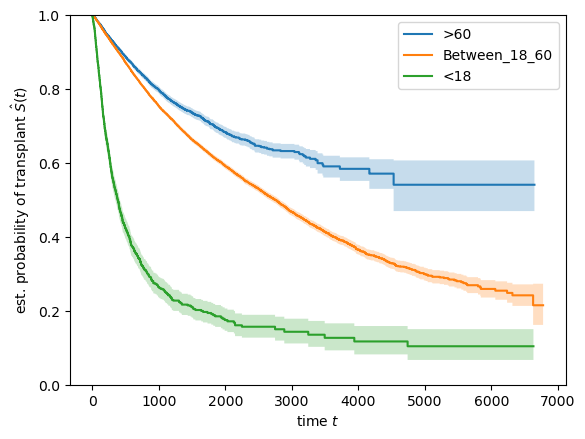

In [47]:
# compare age groups
for age_group in ('>60', 'Between_18_60', '<18'):
    mask = X_data_cat["age_cat"] == age_group
    time_age, survival_prob_age, conf_int = kaplan_meier_estimator(
        Y_data["Transplant_Y_N"][mask],
        Y_data["time"][mask],
        conf_type="log-log",
    )

    plt.step(time_age, survival_prob_age, where="post", label=age_group)
    plt.fill_between(time_age, conf_int[0], conf_int[1], alpha=0.25, step="post")

plt.ylim(0, 1)
plt.ylabel("est. probability of transplant $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

### Sex

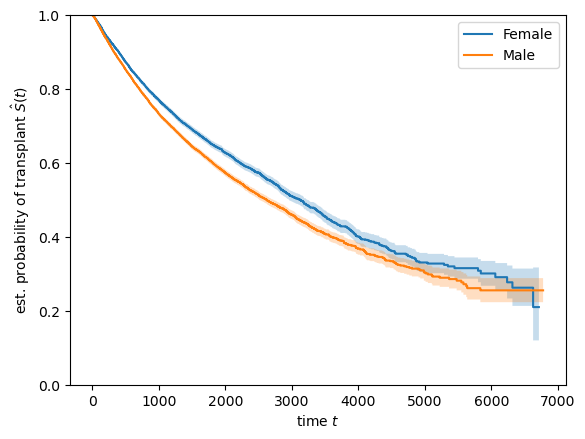

In [49]:
# compare sex
X_data_cat = X_data_cat.replace({'sex': {0: 'Female',1: 'Male'}})
for sex_group in ('Female','Male'):
    mask = X_data_cat["sex"] == sex_group
    time_sex, survival_prob_sex, conf_int = kaplan_meier_estimator(
        Y_data["Transplant_Y_N"][mask],
        Y_data["time"][mask],
        conf_type="log-log",
    )

    plt.step(time_sex, survival_prob_sex, where="post", label=sex_group)
    plt.fill_between(time_sex, conf_int[0], conf_int[1], alpha=0.25, step="post")

plt.ylim(0, 1)
plt.ylabel("est. probability of transplant $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

### cPRA

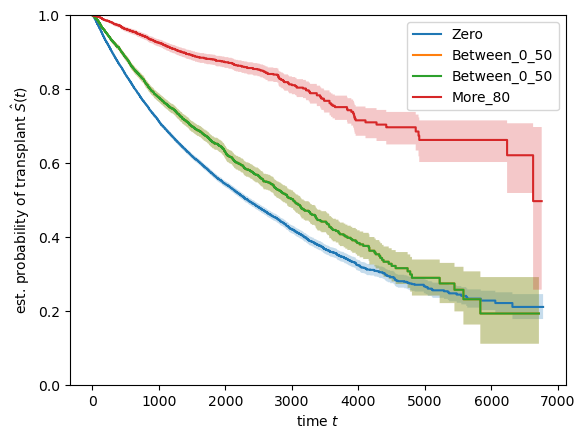

In [50]:
# compare cPRA
for cPRA_group in ('Zero','Between_0_50','Between_0_50','More_80'):
    mask = X_data_cat["cPRA_cat"] == cPRA_group
    time_cPRA, survival_prob_cPRA, conf_int = kaplan_meier_estimator(
        Y_data["Transplant_Y_N"][mask],
        Y_data["time"][mask],
        conf_type="log-log",
    )

    plt.step(time_cPRA, survival_prob_cPRA, where="post", label=cPRA_group)
    plt.fill_between(time_cPRA, conf_int[0], conf_int[1], alpha=0.25, step="post")

plt.ylim(0, 1)
plt.ylabel("est. probability of transplant $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

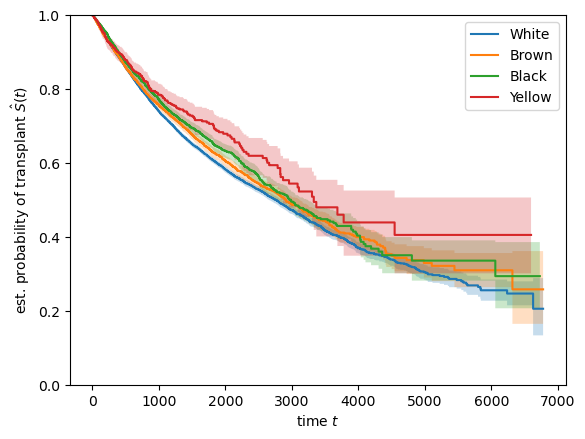

In [54]:
# compare race
for race_group in ('White','Brown','Black','Yellow'):
    mask = X_data_cat["race"] == race_group
    time_race, survival_prob_race, conf_int = kaplan_meier_estimator(
        Y_data["Transplant_Y_N"][mask],
        Y_data["time"][mask],
        conf_type="log-log",
    )

    plt.step(time_race, survival_prob_race, where="post", label=race_group)
    plt.fill_between(time_race, conf_int[0], conf_int[1], alpha=0.25, step="post")

plt.ylim(0, 1)
plt.ylabel("est. probability of transplant $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

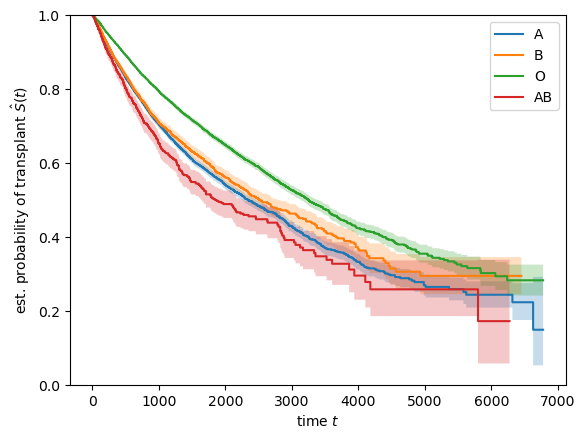

In [55]:
# compare blood type
for blood_group in ('A','B','O','AB'):
    mask = X_data_cat["Blood_type"] == blood_group
    time_blood, survival_prob_blood, conf_int = kaplan_meier_estimator(
        Y_data["Transplant_Y_N"][mask],
        Y_data["time"][mask],
        conf_type="log-log",
    )

    plt.step(time_blood, survival_prob_blood, where="post", label=blood_group)
    plt.fill_between(time_blood, conf_int[0], conf_int[1], alpha=0.25, step="post")

plt.ylim(0, 1)
plt.ylabel("est. probability of transplant $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

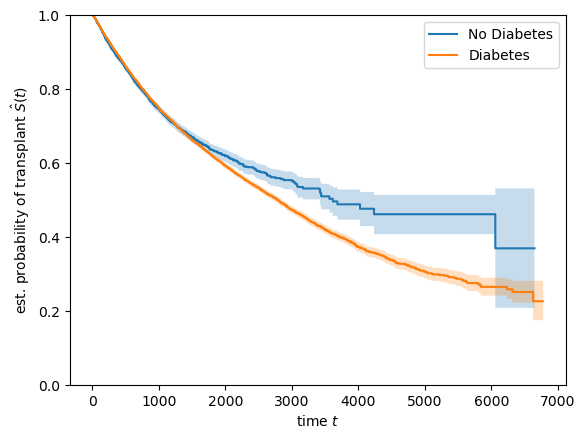

In [56]:
# compare underlying disease
X_data_cat = X_data_cat.replace({'diabetes': {0: 'No Diabetes',1: 'Diabetes'}})
for diabetes_group in ('No Diabetes','Diabetes'):
    mask = X_data_cat["diabetes"] == diabetes_group
    time_diabetes, survival_prob_diabetes, conf_int = kaplan_meier_estimator(
        Y_data["Transplant_Y_N"][mask],
        Y_data["time"][mask],
        conf_type="log-log",
    )

    plt.step(time_diabetes, survival_prob_diabetes, where="post", label=diabetes_group)
    plt.fill_between(time_diabetes, conf_int[0], conf_int[1], alpha=0.25, step="post")

plt.ylim(0, 1)
plt.ylabel("est. probability of transplant $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

### Cox Regression   
Cox's proportional hazard's model can be used to estimate the impact of multivariables on probability of transplant and wait time.

In [34]:
#Splitting test and train
from sklearn.model_selection import train_test_split
X_train_cox, X_test_cox, Y_train_cox, Y_test_cox = train_test_split(X_data, Y_data, test_size=0.3, random_state=101)
Y_train_cox

array([(False,  658.), ( True, 1094.), (False,  486.), ...,
       (False,  324.), (False,  728.), (False, 1321.)],
      dtype=[('Transplant_Y_N', '?'), ('time', '<f8')])

In [35]:
from sklearn import set_config
from sksurv.linear_model import CoxPHSurvivalAnalysis

set_config(display="text")  # displays text representation of estimators

# fit cox regression model
model_cox1 = CoxPHSurvivalAnalysis()

# train cox regression model
model_cox1.fit(X_train_cox, Y_train_cox)

C:\Users\nancy\anaconda3\Lib\site-packages\sksurv\linear_model\coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=6.49376e-20): result may not be accurate.
  delta = solve(
C:\Users\nancy\anaconda3\Lib\site-packages\sksurv\linear_model\coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=2.82286e-20): result may not be accurate.
  delta = solve(
C:\Users\nancy\anaconda3\Lib\site-packages\sksurv\linear_model\coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=1.53179e-18): result may not be accurate.
  delta = solve(
C:\Users\nancy\anaconda3\Lib\site-packages\sksurv\linear_model\coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=3.15907e-19): result may not be accurate.
  delta = solve(
C:\Users\nancy\anaconda3\Lib\site-packages\sksurv\linear_model\coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=8.59782e-19): result may not be accurate.
  delta = solve(
C:\Users\nancy\anaconda3\Lib\site-packages\sksurv\linear_model\coxph.py:449: LinAlgWarning: Ill

CoxPHSurvivalAnalysis()

In [36]:
# model coefficients
pd.Series(model_cox1.coef_, index=X_train_cox.columns)

time_on_Dialysis                   0.000463
sex                                0.012821
diabetes                         -12.065383
number_transfusion                 0.054071
number_gestation                   0.011082
number_prior_transplant           -0.025780
HLA_A1                            -0.003380
HLA_A2                            -0.003240
HLA_B1                            -0.003169
HLA_B2                            -0.002188
HLA_DR1                           -0.003238
HLA_DR2                            0.003232
DR_00                             -1.261763
B_00                              -0.431926
A_00                              -0.267341
chagas                             0.293313
anti.HBc                           0.583077
anti.HCV                          -0.350754
agHBs                              0.430244
age_cat_<18                        1.568857
age_cat_>60                       -0.318134
race_Black                        -0.019003
race_Brown                      

In [37]:
# get model predictions
from sksurv.metrics import concordance_index_censored

cox_pred1 = model_cox1.predict(X_test_cox)
cox_result1 = concordance_index_censored(Y_test_cox["Transplant_Y_N"], Y_test_cox["time"], cox_pred1)
c_stat1 = cox_result1[0]
print(f"Model C-score: {c_stat1}")

Model C-score: 0.704603887537999


### Scaled Cox Regression Model

In [38]:
# scale splitted train test sets
sc = MinMaxScaler()
X_train_cox_sc = sc.fit_transform(X_train_cox)
X_test_cox_sc = sc.transform(X_test_cox)

In [39]:
# fit cox regression model
model_cox1_sc = CoxPHSurvivalAnalysis()

# train cox regression model
model_cox1_sc.fit(X_train_cox_sc, Y_train_cox)

# get model predictions
from sksurv.metrics import concordance_index_censored
cox_pred1_sc = model_cox1_sc.predict(X_test_cox_sc)
cox_result1_sc = concordance_index_censored(Y_test_cox["Transplant_Y_N"], Y_test_cox["time"], cox_pred1_sc)
c_stat1_sc = cox_result1_sc[0]
print(f"Model C-score: {c_stat1_sc}")

C:\Users\nancy\anaconda3\Lib\site-packages\sksurv\linear_model\coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=4.41333e-18): result may not be accurate.
  delta = solve(


Model C-score: 0.704603887537999


### Using Continuous age and cPRA values

In [132]:
df_surv_num = pd.read_csv("../waitlist_kidney_brazil.csv")
columns_remove = ["Id", 
                     "date", 
                    "age_cat",
                    "cPRA_cat",
                     "prior_transplant",
                     "gestation",
                    "calculated_frequency_DR.f1",
                    "calculated_frequency_DR.f2",
                    "calculated_frequency_DR.f",
                    "calculated_frequency_B.f1",
                    "calculated_frequency_B.f2",
                    "calculated_frequency_B.f",
                    "calculated_frequency_A.f1",
                    "calculated_frequency_A.f2",
                    "calculated_frequency_A.f",
                    "date_acutal",
                    "Time_death",
                    "X36MthsTx",
                    "priorization",
                    "razon_removed",
                    "Time_Tx",
                    "patient_still_on_list",
                    "Transplant",
                    "removed_list",
                    "death",
                    "event"]

# Dropping useless columns.
df_surv_num = df_surv_num.drop(columns_remove, axis=1)

# Fill Nan valus for number_gestation.
df_surv_num['number_gestation'] = df_surv_num['number_gestation'].fillna(0)

#Dropping outliers
df_surv_num = df_surv_num[df_surv_num['number_gestation'] <= 15]
df_surv_num.dropna()

X_data_num = X_data.drop(['age_cat_<18', 'age_cat_>60', 
                          'cPRA_cat_Between_0_50', 'cPRA_cat_Between_50_80', 'cPRA_cat_More_80'],
                         axis=1)

X_data_num["age_at_list_registration"] = df_surv_num["age_at_list_registration"]
X_data_num["cPRA"] = df_surv_num["cPRA"]

In [134]:
#Splitting test and train
from sklearn.model_selection import train_test_split
X_train_num, X_test_num, Y_train_num, Y_test_num = train_test_split(X_data_num, Y_data, test_size=0.3, random_state=101)

# scale data
X_train_num = sc.fit_transform(X_train_num)
X_test_num = sc.transform(X_test_num)

In [135]:
# fit cox regression model
model_cox2 = CoxPHSurvivalAnalysis()

# train cox regression model
model_cox2.fit(X_train_num, Y_train_num)

# get model predictions
from sksurv.metrics import concordance_index_censored
cox_pred2 = model_cox2.predict(X_test_num)
cox_result2 = concordance_index_censored(Y_test_num["Transplant_Y_N"], Y_test_num["time"], cox_pred2)
c_stat2 = cox_result2[0]
print(f"Model Continuous Age and cPRA C-score: {c_stat2}")

C:\Users\nancy\anaconda3\Lib\site-packages\sksurv\linear_model\coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=1.02626e-16): result may not be accurate.
  delta = solve(
C:\Users\nancy\anaconda3\Lib\site-packages\sksurv\linear_model\coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=1.63926e-17): result may not be accurate.
  delta = solve(


Model Continuous Age and cPRA C-score: 0.6930400585716737


# Cox Regression with Elastic Net Penalty

In [57]:
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis

from sklearn import set_config
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

set_config(display="text")  # displays text representation of estimators

In [105]:
# Create pipeline to estimate set of alphas for coefficient penalization
import warnings
from sklearn.exceptions import FitFailedWarning
coxnet_pipe = make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01, max_iter=100, fit_baseline_model=True))
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FitFailedWarning)
coxnet_pipe.fit(X_train_cox_sc, Y_train_cox)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(alpha_min_ratio=0.01,
                                        fit_baseline_model=True, l1_ratio=0.9,
                                        max_iter=100))])

In [106]:
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
gcv = GridSearchCV(
    coxnet_pipe,
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=5,
    error_score=0.5,
    n_jobs=1,
)
gcv.fit(X_train_cox_sc, Y_train_cox)

cv_results = pd.DataFrame(gcv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_coxnetsurvivalanalysis__alphas,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.078692,0.012832,0.126897,0.016865,[0.10664418905177621],{'coxnetsurvivalanalysis__alphas': [0.10664418...,0.539401,0.500000,0.500000,0.538567,0.537874,0.523168,0.018923,81
1,0.093469,0.006270,0.150899,0.009231,[0.10179704607132584],{'coxnetsurvivalanalysis__alphas': [0.10179704...,0.539401,0.548299,0.546188,0.538567,0.537874,0.542066,0.004307,80
2,0.098068,0.010723,0.155069,0.003461,[0.0971702132201177],{'coxnetsurvivalanalysis__alphas': [0.09717021...,0.539401,0.548299,0.583063,0.538567,0.537874,0.549441,0.017231,79
3,0.089869,0.013750,0.157516,0.019907,[0.09275367706276469],{'coxnetsurvivalanalysis__alphas': [0.09275367...,0.578759,0.586218,0.583063,0.574748,0.579205,0.580398,0.003925,78
4,0.076450,0.008671,0.136933,0.005874,[0.0885378792899722],{'coxnetsurvivalanalysis__alphas': [0.08853787...,0.604064,0.586218,0.606396,0.574748,0.579205,0.590126,0.012884,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.176269,0.002290,0.158948,0.005818,[0.003108734699278885],{'coxnetsurvivalanalysis__alphas': [0.00310873...,0.699003,0.702331,0.703418,0.700331,0.699731,0.700963,0.001653,3
77,0.186351,0.016965,0.159131,0.003239,[0.0029674379093677507],{'coxnetsurvivalanalysis__alphas': [0.00296743...,0.699041,0.702342,0.703405,0.700254,0.699770,0.700962,0.001642,4
78,0.186387,0.016685,0.160015,0.005498,[0.002832563276626806],{'coxnetsurvivalanalysis__alphas': [0.00283256...,0.699063,0.702362,0.703384,0.700185,0.699791,0.700957,0.001637,6
79,0.210959,0.016929,0.198005,0.021027,[0.0027038189041011054],{'coxnetsurvivalanalysis__alphas': [0.00270381...,0.699119,0.702391,0.703371,0.700128,0.699815,0.700965,0.001628,2


Number of non-zero coefficients: 30


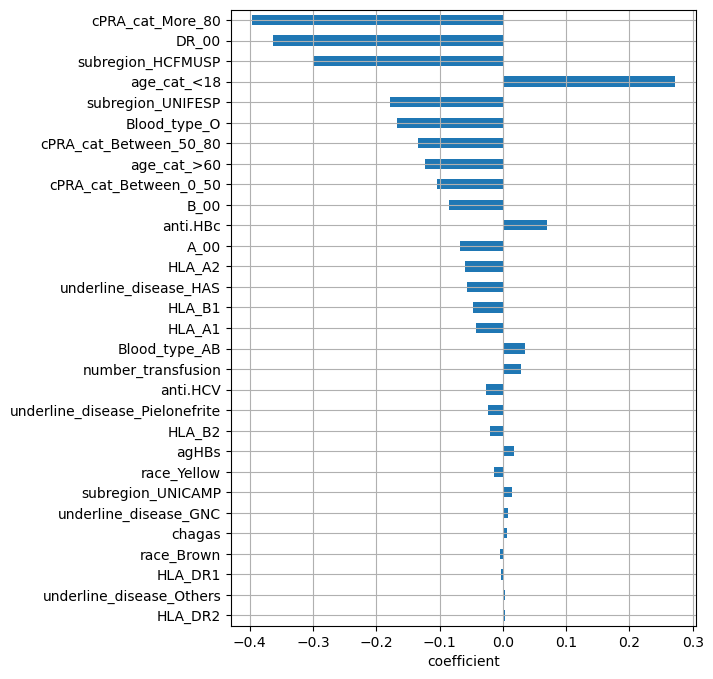

In [107]:
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(best_model.coef_, index=X_train_cox.columns, columns=["coefficient"])

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print(f"Number of non-zero coefficients: {non_zero}")

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [108]:
model_coxnet = gcv.best_estimator_
model_coxnet.fit(X_train_cox_sc, Y_train_cox)
model_coxnet

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(alpha_min_ratio=0.01,
                                        alphas=[0.0025809261620028017],
                                        fit_baseline_model=True, l1_ratio=0.9,
                                        max_iter=100))])

In [109]:
# get model predictions
from sksurv.metrics import concordance_index_censored

coxnet_pred = model_coxnet.predict(X_test_cox_sc)
coxnet_result = concordance_index_censored(Y_test_cox["Transplant_Y_N"], Y_test_cox["time"], coxnet_pred)
c_stat_net = coxnet_result[0]
print(f"Elastic Net Model C-score: {c_stat_net}")

Elastic Net Model C-score: 0.7050129272188826


In [81]:
34421/48153

0.7148256598758125

### Time-Dependent Brier Score

In [112]:
# generate time points to estimate transplant probabilities
lower, upper = np.percentile(Y_data["time"], [10, 90])
txp_times = np.arange(lower, upper + 1)

In [126]:
# get Brier scores for initial cox prop hazard model using all predictors
cox1_surv_prob = np.row_stack([fn(txp_times) for fn in model_cox1.predict_survival_function(X_test_cox)])

In [127]:
# get Brier scores for initial cox prop hazard model using all predictors, scaled
coxsc_surv_prob = np.row_stack([fn(txp_times) for fn in model_cox1_sc.predict_survival_function(X_test_cox_sc)])

In [136]:
# get Brier scores for cox prop hazard model using continuous predictors
cox2_surv_prob = np.row_stack([fn(txp_times) for fn in model_cox2.predict_survival_function(X_test_num)])

In [114]:
# get Brier score for Elastic Net penality model
coxnet_surv_prob = np.row_stack([fn(txp_times) for fn in model_coxnet.predict_survival_function(X_test_cox_sc)])

In [115]:
# get Brier score for a random model
random_surv_prob = 0.5 * np.ones((Y_test_cox.shape[0], txp_times.shape[0]))

In [143]:
# calculate integrated Brier score across all time points
from sksurv.metrics import integrated_brier_score

score_brier = pd.Series(
    [integrated_brier_score(Y_data, Y_test_cox, prob, txp_times)
        for prob in (cox2_surv_prob, coxsc_surv_prob, cox1_surv_prob, coxnet_surv_prob, random_surv_prob)
    ],
    index=["CoxPH_continuous_vars", "CoxPH_categorical_vars", "CoxPH_nonscaled", "CoxPH_ElasticNet", "Random"],
    name="IBS",
)
score_brier

CoxPH_continuous_vars     0.172094
CoxPH_categorical_vars    0.167603
CoxPH_nonscaled           0.167603
CoxPH_ElasticNet          0.167884
Random                    0.250643
Name: IBS, dtype: float64

In [144]:
c_stats = pd.Series([c_stat2, c_stat1_sc, c_stat1, c_stat_net, 0.5],
                   index=["CoxPH_continuous_vars", "CoxPH_categorical_vars", "CoxPH_nonscaled", "CoxPH_ElasticNet", "Random"],
                    name="C-statistic")
c_stats

CoxPH_continuous_vars     0.693040
CoxPH_categorical_vars    0.704604
CoxPH_nonscaled           0.704604
CoxPH_ElasticNet          0.705013
Random                    0.500000
Name: C-statistic, dtype: float64

In [145]:
pd.concat((c_stats, score_brier), axis=1).round(5)

,C-statistic,IBS
CoxPH_continuous_vars,0.69304,0.17209
CoxPH_categorical_vars,0.70460,0.16760
CoxPH_nonscaled,0.70460,0.16760
CoxPH_ElasticNet,0.70501,0.16788
Random,0.50000,0.25064
